## TensorFlow / Keras Basic

### TensorFlow / Keras import

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [9]:
import numpy as np

In [10]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images = train_images.astype(np.float32) / 255. # tf.cast 와 유사
test_images = test_images.astype(np.float32) / 255.

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle( # 다음번에 들어올 데이터를 섞어줌(epoch)
                buffer_size=100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [5]:
def create_seq_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28))) # 이미지 데이터(28*28)이 들어올 때, 1차원으로 들어와야하기 때문에 flatten으로 펴준다(layer 개수로 치지 않음)
  model.add(keras.layers.Dense(128, activation='relu')) # 128개의 perceptron layer 
  model.add(keras.layers.Dropout(0.2)) # overfitting 방지 (layer 개수로 치지 않음)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [6]:
seq_model = create_seq_model()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-18 18:09:05.313545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-18 18:09:05.314009: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Traning / Validation

### Keras API 사용

In [8]:
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10


2022-10-18 18:32:58.893835: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-18 18:32:58.896019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


937/938 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.8080

2022-10-18 18:33:08.078621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 10s 9ms/step - loss: 0.5482 - accuracy: 0.8080 - val_loss: 0.4411 - val_accuracy: 0.8409
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.4020 - accuracy: 0.8569 - val_loss: 0.4010 - val_accuracy: 0.8564
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3665 - accuracy: 0.8672 - val_loss: 0.3742 - val_accuracy: 0.8671
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3454 - accuracy: 0.8749 - val_loss: 0.3635 - val_accuracy: 0.8677
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3277 - accuracy: 0.8792 - val_loss: 0.3547 - val_accuracy: 0.8698
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3145 - accuracy: 0.8849 - val_loss: 0.3449 - val_accuracy: 0.8771
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3060 - accuracy: 0.8874 - val_loss: 0.3365 - val_accuracy: 0.8821
Epoch 8/10
938/9

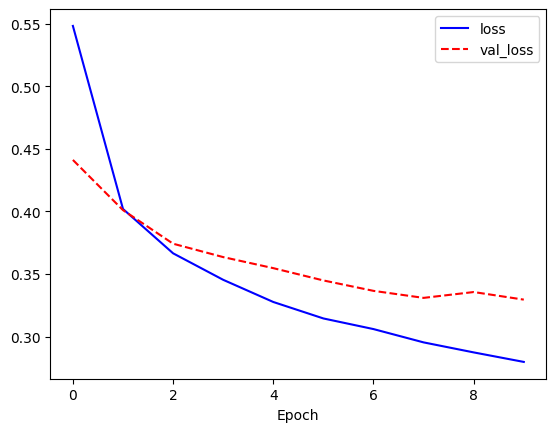

In [14]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

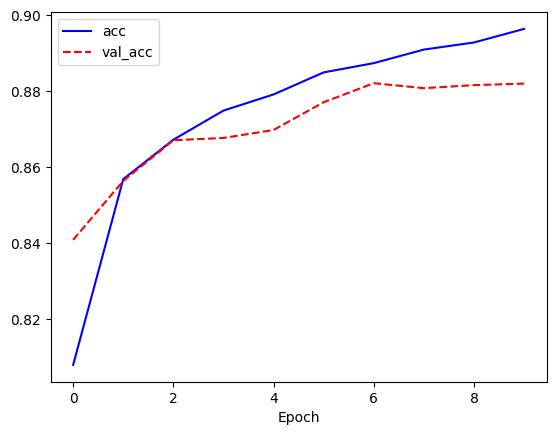

In [15]:
## Plot Accuracy
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### GradientTape 사용

In [ ]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [ ]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [ ]:
@tf.function # 그래프모드로써 속도향상에 도움을 줌
def train_step(model, images, labels): # backpropagation
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # weight 업데이트

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)

  for test_images, test_labels in test_dataset:
    test_step(func_model, test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

## Model 저장하고 불러오기

### parameter만 저장하고 불러오기

In [ ]:
seq_model.save_weights('seq_model.ckpt')

In [ ]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
seq_model_2.evaluate(test_dataset)

In [ ]:
seq_model_2.load_weights('seq_model.ckpt')

In [ ]:
seq_model_2.evaluate(test_dataset)

### Model 전체를 저장하고 불러오기

In [ ]:
seq_model.save('seq_model')

In [ ]:
!ls

In [ ]:
seq_model_3 = keras.models.load_model('seq_model')

In [ ]:
seq_model_3.evaluate(test_dataset)

## Tensorboard 사용하여 시각화하기

In [ ]:
%load_ext tensorboard

### Keras Callback 사용

In [ ]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
new_model_1.evaluate(test_dataset)

In [ ]:
log_dir = './logs/new_model_1'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [ ]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset,
          callbacks=[tensorboard_cb])

In [ ]:
%tensorboard --logdir $log_dir

### Summary Writer 사용

In [ ]:
new_model_2 = create_seq_model()

In [ ]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [ ]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [ ]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(new_model_2, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  for test_images, test_labels in test_dataset:
    test_step(new_model_2, test_images, test_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

In [ ]:
%tensorboard --logdir 'logs/gradient_tape'